<a href="https://colab.research.google.com/github/ThamilezaiAnanthakumar/Skin_disease_Prediction/blob/main/Skin_Diseases_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import numpy as np
import tensorflow as tf
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image  import ImageDataGenerator
from tensorflow.keras import layers,models


In [64]:
#installling kaggle library
!pip install kaggle

In [65]:
#configure the path of kaggle json file
'''!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json'''

'!mkdir -p ~/.kaggle\n!cp kaggle.json ~/.kaggle/\n!chmod 600 ~/.kaggle/kaggle.json'

Importing Data from kaggle API

In [66]:
#kaggle API
!kaggle datasets list


ref                                                           title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
anandshaw2001/netflix-movies-and-tv-shows                     Netflix Movies and TV Shows                         1MB  2025-01-03 10:33:01          13407        349  1.0              
asinow/car-price-dataset                                      Car Price Dataset                                 135KB  2025-01-26 19:53:28           2942         43  1.0              
ankushpanday1/alzheimers-prediction-dataset-global            Alzheimer’s Prediction Dataset (Global)             1MB  2025-01-30 14:38:39           1224         30  1.0              
muhammadhabibna/hospital-data-in-indonesia                    Hospital data in I

In [67]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("subirbiswas19/skin-disease-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/subirbiswas19/skin-disease-dataset/versions/1


In [68]:
#This will help confirm whether train/ and test/ exist.
import os #

dataset_dir = "/root/.cache/kagglehub/datasets/subirbiswas19/skin-disease-dataset/versions/1"

# List the contents of the dataset directory
print("Dataset Contents:", os.listdir(dataset_dir))


Dataset Contents: ['skin-disease-datasaet']


In [69]:
for root, dirs, files in os.walk(dataset_dir):
    print("Root:", root)
    print("Subdirectories:", dirs)
    print("Files:", files)
    print("-" * 40)


Root: /root/.cache/kagglehub/datasets/subirbiswas19/skin-disease-dataset/versions/1
Subdirectories: ['skin-disease-datasaet']
Files: []
----------------------------------------
Root: /root/.cache/kagglehub/datasets/subirbiswas19/skin-disease-dataset/versions/1/skin-disease-datasaet
Subdirectories: ['test_set', 'train_set']
Files: []
----------------------------------------
Root: /root/.cache/kagglehub/datasets/subirbiswas19/skin-disease-dataset/versions/1/skin-disease-datasaet/test_set
Subdirectories: ['BA-impetigo', 'FU-ringworm', 'VI-chickenpox', 'VI-shingles', 'FU-athlete-foot', 'FU-nail-fungus', 'BA- cellulitis', 'PA-cutaneous-larva-migrans']
Files: []
----------------------------------------
Root: /root/.cache/kagglehub/datasets/subirbiswas19/skin-disease-dataset/versions/1/skin-disease-datasaet/test_set/BA-impetigo
Subdirectories: []
Files: ['29_BA-impetigo (22).jpg', '98_BA-impetigo (74).jpg', '10_BA-impetigo (89).jpg', '2_BA-impetigo (16).jpg', '60_BA-impetigo (3).png', '28_BA-

In [70]:
train_dir = "/root/.cache/kagglehub/datasets/subirbiswas19/skin-disease-dataset/versions/1/skin-disease-datasaet/train_set"
test_dir = "/root/.cache/kagglehub/datasets/subirbiswas19/skin-disease-dataset/versions/1/skin-disease-datasaet/test_set"


In [71]:
for root, dirs, files in os.walk(test_dir):
    print("Root:", root)
    print("Subdirectories:", dirs)
    print("Files:", files)
    print("-" * 40)

Root: /root/.cache/kagglehub/datasets/subirbiswas19/skin-disease-dataset/versions/1/skin-disease-datasaet/test_set
Subdirectories: ['BA-impetigo', 'FU-ringworm', 'VI-chickenpox', 'VI-shingles', 'FU-athlete-foot', 'FU-nail-fungus', 'BA- cellulitis', 'PA-cutaneous-larva-migrans']
Files: []
----------------------------------------
Root: /root/.cache/kagglehub/datasets/subirbiswas19/skin-disease-dataset/versions/1/skin-disease-datasaet/test_set/BA-impetigo
Subdirectories: []
Files: ['29_BA-impetigo (22).jpg', '98_BA-impetigo (74).jpg', '10_BA-impetigo (89).jpg', '2_BA-impetigo (16).jpg', '60_BA-impetigo (3).png', '28_BA-impetigo (6).jpeg', '89_BA-impetigo (86).jpg', '9_BA-impetigo (42).jpg', '41_BA-impetigo (89).jpg', '59_BA-impetigo (6).jpg', '27_BA-impetigo (54).jpg', '50_BA-impetigo (38).jpg', '18_BA-impetigo (82).jpg', '62_BA-impetigo (23).jpg', '88_BA-impetigo (67).jpg', '31_BA-impetigo (26).jpg', '49_BA-impetigo (17).jpg', '22_BA-impetigo (55).jpg', '64_BA-impetigo (2).png', '42_BA-i

In [72]:
for root, dirs, files in os.walk(train_dir):
    print("Root:", root)
    print("Subdirectories:", dirs)
    print("Files:", files)
    print("-" * 40)

Root: /root/.cache/kagglehub/datasets/subirbiswas19/skin-disease-dataset/versions/1/skin-disease-datasaet/train_set
Subdirectories: ['BA-impetigo', 'FU-ringworm', 'VI-chickenpox', 'VI-shingles', 'FU-athlete-foot', 'FU-nail-fungus', 'BA- cellulitis', 'PA-cutaneous-larva-migrans']
Files: []
----------------------------------------
Root: /root/.cache/kagglehub/datasets/subirbiswas19/skin-disease-dataset/versions/1/skin-disease-datasaet/train_set/BA-impetigo
Subdirectories: []
Files: ['45_BA-impetigo (37).jpg', '3_BA-impetigo (77).jpg', '99_BA-impetigo (45).jpg', '32_BA-impetigo (85).jpg', '14_BA-impetigo (5).jpeg', '83_BA-impetigo (67).jpg', '5_BA-impetigo (27).jpg', '95_BA-impetigo (4).jpg', '55_BA-impetigo (10).jpg', '21_BA-impetigo (64).jpg', '79_BA-impetigo (2).png', '97_BA-impetigo (58).jpg', '96_BA-impetigo (17).jpg', '6_BA-impetigo (19).jpg', '53_BA-impetigo (42).jpg', '84_BA-impetigo (65).jpg', '48_BA-impetigo (17).jpg', '37_BA-impetigo (7).jpeg', '16_BA-impetigo (5).jpg', '12_BA-

In [73]:
classes = os.listdir(train_dir)
print(f"Classes: {classes}")

for class_name in classes:
    print(f"{class_name}: {len(os.listdir(os.path.join(train_dir, class_name)))} images")


Classes: ['BA-impetigo', 'FU-ringworm', 'VI-chickenpox', 'VI-shingles', 'FU-athlete-foot', 'FU-nail-fungus', 'BA- cellulitis', 'PA-cutaneous-larva-migrans']
BA-impetigo: 80 images
FU-ringworm: 90 images
VI-chickenpox: 136 images
VI-shingles: 130 images
FU-athlete-foot: 124 images
FU-nail-fungus: 129 images
BA- cellulitis: 136 images
PA-cutaneous-larva-migrans: 100 images


In [74]:
classes = os.listdir(test_dir)
print(f"Classes: {classes}")

for class_name in classes:
    print(f"{class_name}: {len(os.listdir(os.path.join(train_dir, class_name)))} images")


Classes: ['BA-impetigo', 'FU-ringworm', 'VI-chickenpox', 'VI-shingles', 'FU-athlete-foot', 'FU-nail-fungus', 'BA- cellulitis', 'PA-cutaneous-larva-migrans']
BA-impetigo: 80 images
FU-ringworm: 90 images
VI-chickenpox: 136 images
VI-shingles: 130 images
FU-athlete-foot: 124 images
FU-nail-fungus: 129 images
BA- cellulitis: 136 images
PA-cutaneous-larva-migrans: 100 images


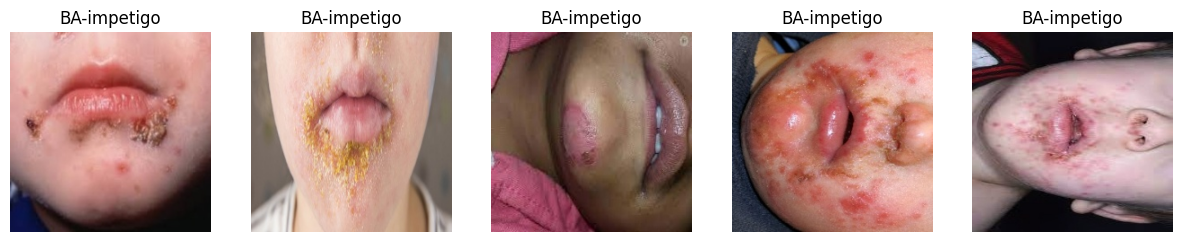

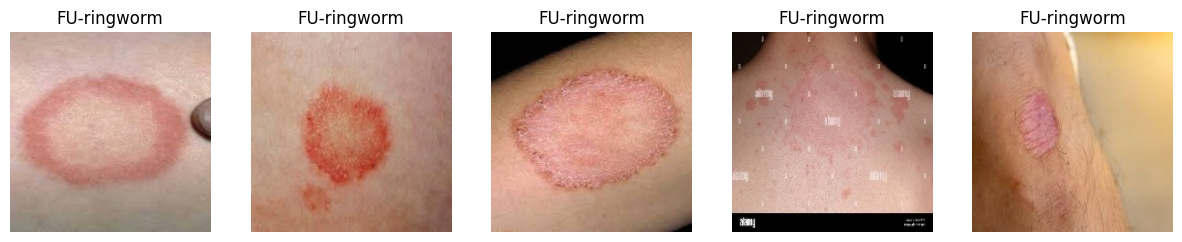

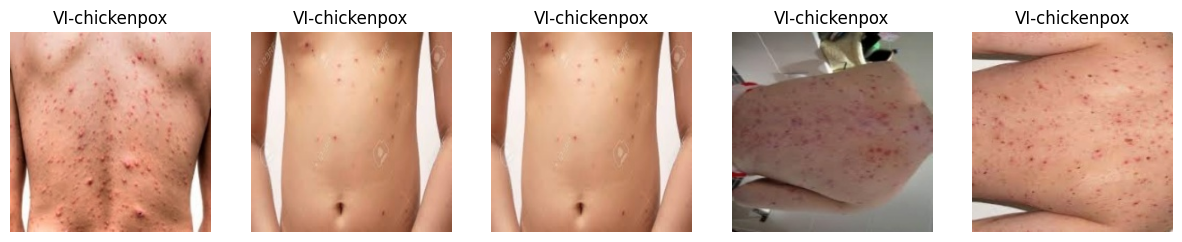

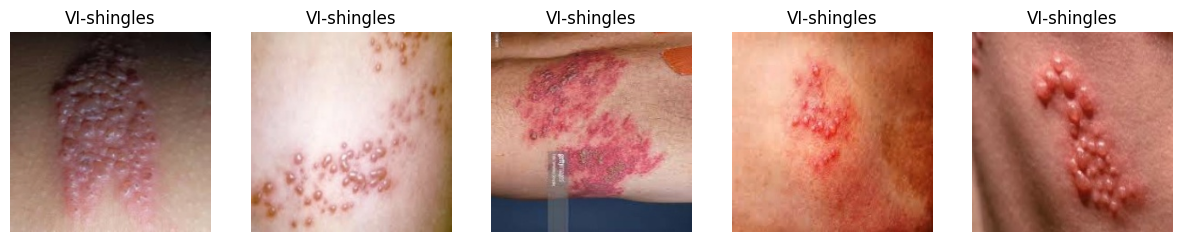

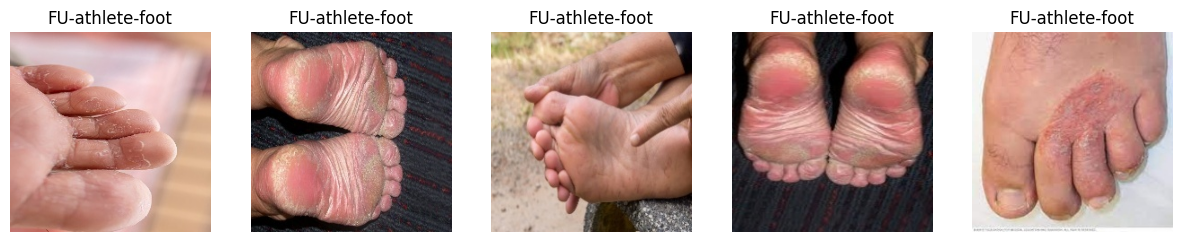

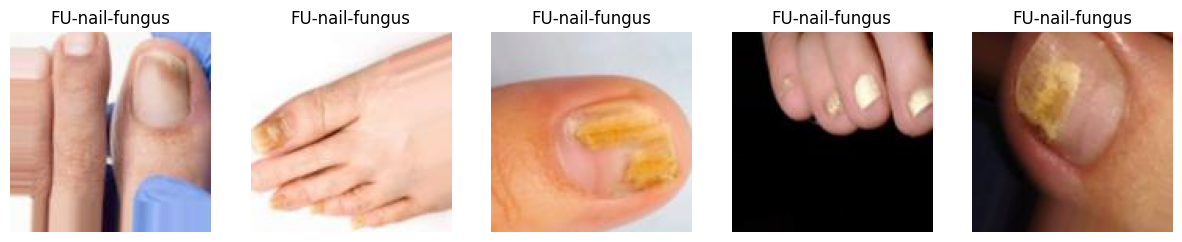

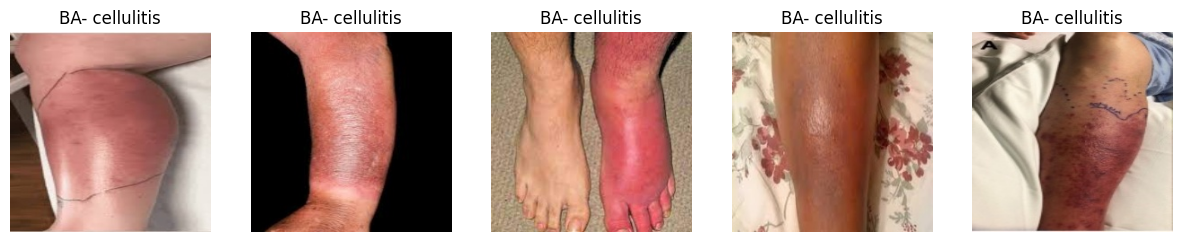

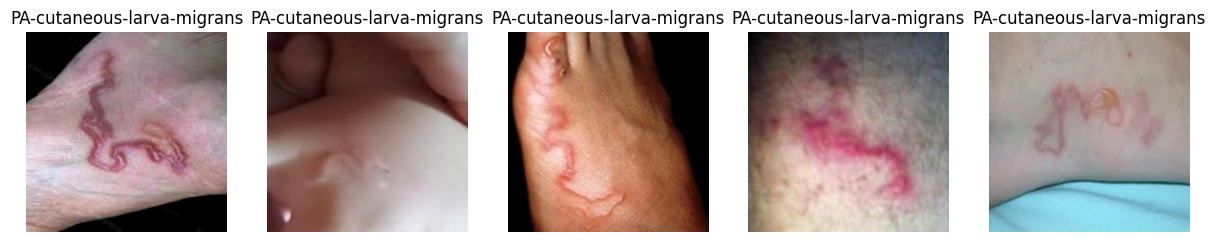

In [75]:
import cv2
def display_images(folder, class_name, n=5):
    images = os.listdir(os.path.join(folder, class_name))[:n]
    fig, axes = plt.subplots(1, n, figsize=(15, 5))
    for i, img_name in enumerate(images):
        img_path = os.path.join(folder, class_name, img_name)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        axes[i].imshow(img)
        axes[i].axis("off")
        axes[i].set_title(class_name)
    plt.show()

for class_name in classes[:8]:  # Display first 3 classes
    display_images(train_dir, class_name, n=5)


In [76]:
img_size = (128, 128)
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(train_dir, target_size=img_size, batch_size=batch_size, class_mode="categorical")
test_data = test_datagen.flow_from_directory(test_dir, target_size=img_size, batch_size=batch_size, class_mode="categorical")


Found 924 images belonging to 8 classes.
Found 233 images belonging to 8 classes.


In [77]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(len(classes), activation="softmax")
])

model.compile(optimizer=Adam(learning_rate=0.001), loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │       7,372,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 8)                   │           1,032 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,393,352 (28.20 MB)

 Trainable params: 7,393,352 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

In [78]:
history = model.fit(train_data, epochs=25, validation_data=test_data)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.1458 - loss: 2.8252 - val_accuracy: 0.2618 - val_loss: 2.0125
Epoch 2/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.2042 - loss: 1.9999 - val_accuracy: 0.2575 - val_loss: 1.8991
Epoch 3/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.2346 - loss: 1.9500 - val_accuracy: 0.2747 - val_loss: 1.8530
Epoch 4/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.2881 - loss: 1.8942 - val_accuracy: 0.3820 - val_loss: 1.7261
Epoch 5/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.3431 - loss: 1.7416 - val_accuracy: 0.3863 - val_loss: 1.7417
Epoch 6/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.3708 - loss: 1.7359 - val_accuracy: 0.4077 - val_loss: 1.5739
Epoch 7/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.4004 - loss: 1.6179 - val_accuracy: 0.5107 - val_loss: 1.4663
Epoch 8/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.4894 - loss: 1.4955 - val_accuracy: 0.5021 - val_loss:

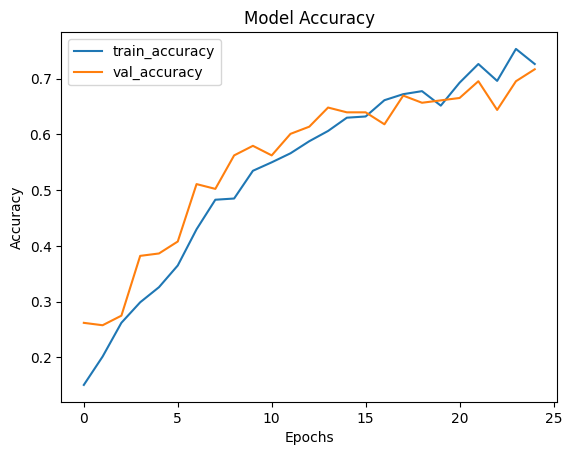

In [79]:
plt.plot(history.history["accuracy"], label="train_accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Model Accuracy")
plt.show()


In [80]:
model.save('skin_disease.keras')



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
Predicted Skin Disease: FU-ringworm


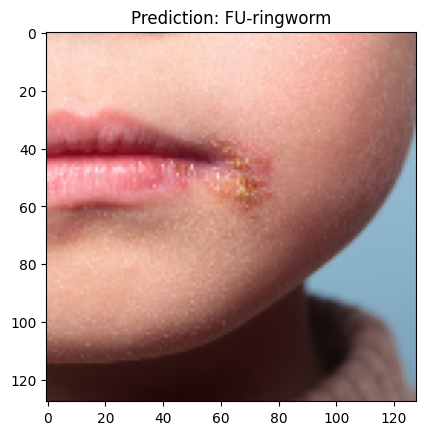

In [81]:
from tensorflow.keras.preprocessing import image
def predict_skin_disease(image_path):

    img = image.load_img(image_path, target_size=img_size)
    img_array = image.img_to_array(img) / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    predicted_class = classes[np.argmax(prediction)]

    print(f"Predicted Skin Disease: {predicted_class}")
    plt.imshow(img)
    plt.title(f"Prediction: {predicted_class}")
    plt.show()

# Example usage:
predict_skin_disease('/content/test_2.jpeg')  # Replace with test image path
